### Sample citizens to QA model setup

### Profile dimensions to consider based on literature
1. Lives in the flat that owns
2. Is not in the former east Germany nor in Baviera or Baden-Wuttenberg
3. Represents only highly inefficient building types: 
    * Freistehendes Ein-/ Zweifamilienhaus
    * Reihen-/Doppelhaus

**Perform stratified randomization based on:**
1. Represents the three different income levels in Germany (according to the Statistische Bundesamt)
    * Poverty risk: below 1200 eur
    * Low income: between 1200 and 3200 eur
    * Mid income: between 3200 and 5700 eur
    * High income: above 5700 eur
2. Represents the three different city density sizes
    * Small City: Less than 20,000 inhabitants
    * Mid-size City: 20,000 to 100,000 inhabitants
    * Large City: More than 100,000 inhabitants
3. Represents either low wealth level (salary as unique source of income) or high wealth level (other properties income, inheritance or investments)
    * Has properties/inheritance
    * Does not have properties/inheritance
4. Highest education level
    * a) No or Secondary School
        * Keinen Abschluss
        * Abschluss nach höchstens 7 Jahren Schulbesuch (insbesondere Abschluss im Ausland)
        * Haupt-/Volksschulabschluss
        * Realschulabschluss (Mittlere Reife), Abschluss der Polytechnischen Oberschule oder gleichwertiger Abschluss
        * Fachhochschulreife
        * Allgemeine oder fachgebundene Hochschulreife (Abitur)
    * b) Professional Education/Ausbildung
        * Anlernausbildung oder berufliches Praktikum von mindestens 12 Monaten
        * Berufsvorbereitungsjahr
        * Lehre, Berufsausbildung im dualen System
        * Vorbereitungsdienst für den mittleren Dienst in der öffentlichen Verwaltung
        * Berufsqualifizierender Abschluss an einer Berufsfachschule/Kollegschule, Abschluss einer 1-jährigen Schule des Gesundheitswesens
        * 2- oder 3-jährige Schule des Gesundheitswesens (z. B. Krankenpflege, PTA, MTA)
        * Fachschulabschluss (Meister/-in, Techniker/-in oder gleichwertiger Abschluss)
        * Berufsakademie, Fachakademie
        * Abschluss einer Verwaltungsfachhochschule
    * c) University/Hochschule Degree
        * Fachhochschulabschluss, auch Ingenieurschulabschluss
        * Abschluss einer Universität, wissenschaftlichen Hochschule, Kunsthochschule
        * Promotion
5. Building age based on regulation periods
    * Before 1978
    * From 1978 to 2002
    * From 2002 on
6. Professional status
    * Employee
    * Pensionist
    * Unemploy or social support

**Track:**
1. Political orientation
    * Left
    * Center
    * Right
2. Level of altruism
    * High
    * Low
3. Respect for the nature conservation
    * High
    * Low
4. Believes in energy efficiency meassures
    * None
    * Any
4. Life management
    * High
    * Low
5. Time frame for profit seek
    * Long
    * Short

**Ensure representation of citizens based on their price elasticity**
* Always takers or Free raiders
* Price-elastic or compliers
* Never-takers

### Profile citizens type based on the most relevant factors

### Extract most relevant factors from logistic regression

In [349]:
import sys
sys.path.append("../../../")

import pandas as pd
import numpy as np

from scipy.stats import chi2_contingency

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from scipy.stats import chi2_contingency
import statsmodels.api as sm

from src.data_helpers.sampling_wuw import relevant_bundesland, relevant_building_type, education_level, income_level, building_age,\
                                            political_opinion, altruism
from src.data_helpers.renovation_decision_processor import process_regional_information

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Filter out non-relevant samples: south/east regions, owners not living in the property and more than 2-families building

In [350]:
df_experiment = pd.read_csv("../../../data/ariadne/heating_buildings/df_experiment2.csv", encoding='ISO-8859-1')
df_ground = pd.read_csv("../../../data/ariadne/heating_buildings/df_ground2.csv", encoding='ISO-8859-1')
df_processed = pd.read_csv("../../../data/ariadne/heating_buildings/x_processed_cata.csv")
df_questions = pd.read_csv("../../../data/ariadne/heating_buildings/questions_selected_survey_mapper.csv", sep=';', encoding='latin-1', on_bad_lines='skip')

experiment_ExpSan_Alt_8_CA_TA = [['ea801a', 'ea802a', 'ea803a', 'ea804a', 'ea805a', 'ea806a', 'ea807a', 'ea808a', 'ea809a', 'ea810a', 'ea811a', 
                                  'ea812a', 'ea813a', 'ea814a', 'ea815a'], ['ea801b', 'ea802b', 'ea803b', 'ea804b', 
                                 'ea805b', 'ea806b', 'ea807b', 'ea808b', 'ea809b', 'ea810b', 'ea811b', 'ea812b', 'ea813b', 'ea814b', 'ea815b']]
df_complete = df_ground.merge(df_experiment[['key','dzuf5','dzuf6']+experiment_ExpSan_Alt_8_CA_TA[0]+experiment_ExpSan_Alt_8_CA_TA[1]],
                  on='key')
df_complete_exp = df_complete[df_complete['dzuf5']!=-2]

In [351]:
print(len(df_experiment[df_experiment['dzuf5']!=-2]), len(df_experiment[df_experiment['dzuf5']!=-2]['key'].unique()))
print(len(df_complete[df_complete['dzuf5']!=-2]), len(df_complete[df_complete['dzuf5']!=-2]['key'].unique()))
print(len(df_complete_exp[df_complete_exp['dzuf5']!=-2]), len(df_complete_exp[df_complete_exp['dzuf5']!=-2]['key'].unique()))

1062 1062
1062 1062
1062 1062


In [352]:
print(len(df_experiment['key'].unique()),
      len(df_ground['key'].unique()),
      len(df_complete_exp['key'].unique()),
      len(df_complete['key'].unique()))

15416 15416 1062 15416


In [353]:
print(len(df_experiment),
      len(df_ground),
      len(df_complete_exp),
      len(df_complete))

15416 15416 1062 15416


In [354]:
print(len(df_experiment.drop_duplicates()),
      len(df_ground.drop_duplicates()),
      len(df_complete_exp.drop_duplicates()),
      len(df_complete.drop_duplicates()))

15416 15416 1062 15416


In [355]:
# filter out non-considered bundeslaender, owners that do not live/will live in their properties and more than 2-family buildings
cond_bundesland = (df_complete_exp['bundesland_name'].isin(relevant_bundesland))
cond_live_in_house = (df_complete_exp['a5']!=-1) & (df_complete_exp['a6']!=-1)
cond_building_type = (df_complete_exp['a4'].isin(relevant_building_type))
df_sel_complete = df_complete_exp[cond_live_in_house & cond_building_type] # cond_bundesland

In [356]:
print(len(df_complete_exp), len(df_sel_complete))

1062 928


### 2. Categorize sampling factors

#### 2.1. Highest education level

In [357]:
# Discard samples that do not have info for these categories
cond_professional = (df_sel_complete['so2'].isin(education_level['professional']))
cond_academic = (df_sel_complete['so2'].isin(education_level['academic']))
cond_secondary = (df_sel_complete['so2'].isin([-1,1])) & (df_sel_complete['so1']!=-1)
df_sel_complete.loc[cond_professional, 'high_education_level'] = "professional"
df_sel_complete.loc[cond_academic, 'high_education_level'] = "academic"
df_sel_complete.loc[cond_secondary, 'high_education_level'] = "second_school"
df_sel_complete_edu = df_sel_complete.dropna(subset=['high_education_level'])

In [358]:
print(len(df_sel_complete), len(df_sel_complete_edu))

928 925


#### 2.2. Income Level

In [359]:
cond_poverty = (df_sel_complete_edu['so5'].isin(income_level['poverty']))
cond_low = (df_sel_complete_edu['so5'].isin(income_level['low']))
cond_mid = (df_sel_complete_edu['so5'].isin(income_level['mid']))
cond_high = (df_sel_complete_edu['so5'].isin(income_level['high']))
df_sel_complete_edu.loc[cond_poverty, 'total_income_level'] = "pov_income"
df_sel_complete_edu.loc[cond_low, 'total_income_level'] = "low_income"
df_sel_complete_edu.loc[cond_mid, 'total_income_level'] = "mid_income"
df_sel_complete_edu.loc[cond_high, 'total_income_level'] = "high_income"
df_sel_complete_inc = df_sel_complete_edu.dropna(subset=['total_income_level'])

In [360]:
print(len(df_sel_complete_inc), len(df_sel_complete_edu), len(df_sel_complete_edu[df_sel_complete_edu['so5'].isin([-1,13])]))

824 925 101


#### 2.3. Building age (regulatory framework)

In [361]:
cond_old = (df_sel_complete_inc['ist6'].isin(building_age['before_1978']))
cond_mid = (df_sel_complete_inc['ist6'].isin(building_age['1978_2001']))
cond_new = (df_sel_complete_inc['ist6'].isin(building_age['2002_on']))
df_sel_complete_inc.loc[cond_old, 'building_period'] = "before_1978"
df_sel_complete_inc.loc[cond_mid, 'building_period'] = "1978_2001"
df_sel_complete_inc.loc[cond_new, 'building_period'] = "2002_on"
df_sel_complete_age = df_sel_complete_inc.dropna(subset=['building_period'])

In [362]:
print(len(df_sel_complete_age), len(df_sel_complete_inc), len(df_sel_complete_inc[df_sel_complete_inc['ist6'].isin([16])]))

824 824 0


#### 2.4. Professional Status

In [363]:
cond_employed = (df_sel_complete_age['so3_1']==1)
cond_unemployed_arb_geld = (df_sel_complete_age['so3_1']!=1) & ((df_sel_complete_age['so3_8']==1) | (df_sel_complete_age['so3_9']==1) | (df_sel_complete_age['so3_10']==1))
cond_unemployed_pens = (df_sel_complete_age['so3_1']!=1) & (df_sel_complete_age['so3_4']==1)
cond_unemployed_dependent = (df_sel_complete_age['so3_1']!=1) & (df_sel_complete_age['so3_11']!=1) & (df_sel_complete_age['so3_12']!=1) & \
    (df_sel_complete_age['so3_8']!=1) & (df_sel_complete_age['so3_9']!=1) & (df_sel_complete_age['so3_10']!=1) & (df_sel_complete_age['so3_4']!=1)
df_sel_complete_age.loc[cond_employed, 'prof_status'] = "employed"
df_sel_complete_age.loc[cond_unemployed_arb_geld, 'prof_status'] = "arbeitloss_geld"
df_sel_complete_age.loc[cond_unemployed_pens, 'prof_status'] = "pension"
df_sel_complete_age.loc[cond_unemployed_dependent, 'prof_status'] = "dependent"
df_sel_complete_prof = df_sel_complete_age.dropna(subset=['prof_status'])

In [364]:
print(len(df_sel_complete_prof), len(df_sel_complete_age))

803 824


#### 2.5. Wealth level

In [365]:
cond_high_wealth = (df_sel_complete_prof['so3_5']==1) | (df_sel_complete_prof['so6']==1)
df_sel_complete_prof.loc[cond_high_wealth, "is_high_wealth"] = 1
df_sel_complete_prof['is_high_wealth'] = df_sel_complete_prof['is_high_wealth'].fillna(0)

In [366]:
print(len(df_sel_complete_prof))

803


#### 2.6. City size

In [367]:
df_sel_complete_size = process_regional_information(df_sel_complete_prof)
df_sel_complete_size['city_size'] = df_sel_complete_size['city_category'].map({1:'small',2:'mid-size',3:'large'})

(803, 323) (803, 324)


In [368]:
print(len(df_sel_complete_prof), len(df_sel_complete_size))

803 803


### 3. Group psychological features

#### 3.1. Political orientation

In [369]:
cond_right = (df_sel_complete_size['so7'].isin(political_opinion['right']))
cond_center = (df_sel_complete_size['so7'].isin(political_opinion['center']))
cond_left = (df_sel_complete_size['so7'].isin(political_opinion['left']))
df_sel_complete_size.loc[cond_right, 'pol_orientation'] = "right"
df_sel_complete_size.loc[cond_center, 'pol_orientation'] = "center"
df_sel_complete_size.loc[cond_left, 'pol_orientation'] = "left"
df_sel_complete_pol = df_sel_complete_size.dropna(subset=['pol_orientation'])

In [370]:
print(len(df_sel_complete_prof), len(df_sel_complete_pol))

803 785


#### 3.2. Level of altruism

In [371]:
con_altru = (df_sel_complete_pol['altru1_2'].isin(altruism['altruist']))
con_non_altru = (df_sel_complete_pol['altru1_2'].isin(altruism['non-altruist']))
df_sel_complete_pol.loc[con_altru, 'is_altruist'] = 1
df_sel_complete_pol.loc[con_non_altru, 'is_altruist'] = 0
df_sel_complete_altru = df_sel_complete_pol.dropna(subset=['is_altruist'])

In [372]:
print(len(df_sel_complete_altru), len(df_sel_complete_pol))

589 785


In [373]:
# the loss of data is too high, attribute the label "non-altruist" to those that do not clarify the answer
df_sel_complete_pol['is_altruist'] = df_sel_complete_pol['is_altruist'].fillna(0)

#### 3.3. Respect for the nature conservation & life ownership

In [374]:
def average_excluding_negatives(row):
    # Select only non-negative values
    non_negatives = row[row >= 0]
    # Return the mean of these values
    if len(non_negatives) > 0:
        return non_negatives.mean()
    else:
        return np.nan 

lower_threshold = 2
upper_threshold = 4
choices = ['Low', 'Medium', 'High']
df_sel_complete_pol['nature_average'] = df_sel_complete_pol[['pk1_1','pk1_2','pk1_3','pk1_4','pk1_5','pk1_6']].apply(average_excluding_negatives, axis=1)
cond_nature = [
    df_sel_complete_pol['nature_average'] <= lower_threshold, 
    (df_sel_complete_pol['nature_average'] > lower_threshold) & (df_sel_complete_pol['nature_average'] < upper_threshold),
    df_sel_complete_pol['nature_average'] >= upper_threshold
]
df_sel_complete_pol['nature_level'] = np.select(cond_nature, choices)
df_sel_complete_pol['ownership_average'] = df_sel_complete_pol[['pk2_1','pk2_2','pk2_3','pk2_4','pk2_5','pk2_6','pk2_7']].apply(average_excluding_negatives, axis=1)
cond_ownership = [
    df_sel_complete_pol['ownership_average'] <= lower_threshold, 
    (df_sel_complete_pol['ownership_average'] > lower_threshold) & (df_sel_complete_pol['ownership_average'] < upper_threshold),
    df_sel_complete_pol['ownership_average'] >= upper_threshold
]
df_sel_complete_pol['ownership_level'] = np.select(cond_ownership, choices)

#### 3.4. Timeframe profits

In [375]:
def label_profit_focus(row):
    # If any of the choices is for long-term profit, return 'long'
    if 2 in row.values:
        return 'long'
    # Otherwise, return 'short'
    return 'short'

def label_ee_belief(row):
    # If any of the choices is for long-term profit, return 'long'
    if -1 in row.values or -2 in row.values:
        return 0
    # Otherwise, return 'short'
    return 1

df_sel_complete_pol['profit_focus'] = df_sel_complete_pol[['pk31','pk32','pk33']].apply(label_profit_focus, axis=1)
df_sel_complete_pol['ee_belief'] = df_sel_complete_pol[['bel2_1']].apply(label_ee_belief, axis=1)

In [376]:
relevant_columns = [ 'city_size','high_education_level','total_income_level','building_period',
                     'prof_status','is_high_wealth','pol_orientation','is_altruist','nature_average',
                     'ownership_average','nature_level','ownership_level','profit_focus','ee_belief']
print(len(df_sel_complete_pol), df_sel_complete_pol[relevant_columns].isnull().sum().sum(), df_sel_complete_pol.isnull().sum().sum())

785 2 126


In [377]:
null_counts = df_sel_complete_pol.isnull().sum()
null_counts[null_counts > 0]

ebjmp                124
ownership_average      2
dtype: int64

In [378]:
df_sel_complete_pol.to_csv("../../../data/ariadne/heating_buildings/df_cata_completed_processed_relevant_factors.csv", index=False, encoding='ISO-8859-1')

### 4. Group citizens based on their price elasticity towards heating renovations

* Defiers
* Always takers or Free raiders
* Price-elastic or compliers
* Never-takers

In [379]:
df_sel_complete_pol_ta = df_sel_complete_pol[df_sel_complete_pol['dzuf5']!=1]

In [380]:
# Only citizens exposed to treatment are left
df_sel_complete_pol_ta['dzuf5'].value_counts()

dzuf5
2    396
Name: count, dtype: int64

In [381]:
# Similar percentage of samples having simple renovation as first or second option
df_sel_complete_pol_ta['dzuf6'].value_counts()

dzuf6
1    201
2    195
Name: count, dtype: int64

#### 4.1. Unify decisions data for the option A/B

In [382]:
def adjust_values(row):
    if row['dzuf6'] == 2:
        for col in new_columns:
            if row[col] == 1:
                row[col] = 2
            elif row[col] == 2:
                row[col] = 1
    return row

new_columns = ['ea801', 'ea802', 'ea803', 'ea804', 'ea805', 'ea806', 'ea807', 'ea808', 'ea809', 'ea810', 'ea811', 
               'ea812', 'ea813', 'ea814', 'ea815']
df_exp_clean = df_sel_complete_pol_ta[['key','dzuf6'] + experiment_ExpSan_Alt_8_CA_TA[0] + experiment_ExpSan_Alt_8_CA_TA[1]].replace(-2, np.nan)
for new_col, col_a, col_b in zip(new_columns, experiment_ExpSan_Alt_8_CA_TA[0], experiment_ExpSan_Alt_8_CA_TA[1]):
    df_exp_clean[new_col] = df_exp_clean[col_a].combine_first(df_exp_clean[col_b])
df_exp_clean.drop(columns=experiment_ExpSan_Alt_8_CA_TA[0] + experiment_ExpSan_Alt_8_CA_TA[1], inplace=True)
df_exp_clean = df_exp_clean.apply(adjust_values, axis=1)
    
assert df_sel_complete_pol_ta.loc[30,'ea806b'] != df_exp_clean.loc[30,'ea806']
assert df_sel_complete_pol_ta.loc[209,'ea806a'] == df_exp_clean.loc[209,'ea806']
assert df_sel_complete_pol_ta.loc[795,'ea806a'] == df_exp_clean.loc[795,'ea806']
assert df_sel_complete_pol_ta.loc[30,'ea806b'] == 1.0

df_sel_complete_pol_ta_new = df_sel_complete_pol_ta.drop(columns=experiment_ExpSan_Alt_8_CA_TA[0] + experiment_ExpSan_Alt_8_CA_TA[1])
df_sel_complete_pol_ta_clean = df_sel_complete_pol_ta_new.merge(df_exp_clean[['key'] + new_columns], on='key')

In [383]:
print(len(df_sel_complete_pol_ta_clean), len(df_sel_complete_pol_ta), df_sel_complete_pol_ta_clean.isnull().sum().sum(), df_sel_complete_pol_ta.isnull().sum().sum())

396 396 67 67


In [384]:
null_counts = df_sel_complete_pol_ta_clean.isnull().sum()
null_counts[null_counts > 0]

ebjmp                65
ownership_average     2
dtype: int64

In [385]:
print(len(df_sel_complete_pol_ta_clean), len(df_sel_complete_pol_ta_clean['key'].unique()))

396 396


#### 4.2. Attribute customer group to each citizen

In [456]:
def categorize_row(row):
    if all(row[col] == 3 for col in new_columns):
        return 'unknown'
    elif all(row[col] == 1 for col in new_columns):
        return 'never taker'
    elif all(row[col] == 2 for col in new_columns):
        return 'free rider'
    elif any(row[col] == 1 for col in new_columns) and any(row[col] == 2 for col in new_columns):
        # from 2-5 low
        if row['ea801'] == 2 and any(row[col] == 1 for col in ['ea802', 'ea803', 'ea804', 'ea805']):
            return 'complier'#'hard_complier'
        # from 6-10 middle
        elif row['ea805'] == 2 and any(row[col] == 1 for col in ['ea806', 'ea807', 'ea808', 'ea809', 'ea810']):
            return 'complier'#'midle_complier'
        # from 11 to 15 high
        elif row['ea810'] == 2 and any(row[col] == 1 for col in ['ea811', 'ea812', 'ea813', 'ea814', 'ea815']):
            return 'complier'#'easy_complier'
        else:
            return 'defier'
    else:
        return 'other'  # For any rows that don't fit the above categories

df_sel_complete_pol_ta_clean['citizen_type'] = df_sel_complete_pol_ta_clean.apply(categorize_row, axis=1)

In [458]:
df_sel_complete_pol_ta_clean['citizen_type'].value_counts()

citizen_type
unknown        177
complier       100
never taker     68
free rider      41
defier          10
Name: count, dtype: int64

In [459]:
df_sel_complete_pol_ta_clean.to_csv("../../../data/ariadne/heating_buildings/df_cata_completed_processed_relevant_factors_citizen_type.csv", index=False, encoding='ISO-8859-1')

In [436]:
df_sel_complete_pol_ta_clean['a6'].unique()

array([5, 4, 3, 1, 2])

In [437]:
df_sel_complete_pol_ta_clean['no_renovation_reason'].value_counts()

no_renovation_reason
Ich möchte jetzt keine Entscheidung treffen, die tatsächliche Auswirkungen für mich haben kann    132
Eine Heizungsoptimierung wurde schon durchgeführt                                                 127
Eine Heizungsoptimierung kann in meinem Haus aus technischen Gründen nicht durchgeführt werden     63
Ich habe mich für eine Option entschieden, die nicht angeboten wird.                               61
Ich bin nicht zuständig, eine Heizungsoptimierung durchführen zu lassen                            13
Name: count, dtype: int64

In [438]:
df_sel_complete_pol_ta_clean[['no_renovation_reason','citizen_type','key']].groupby(['no_renovation_reason','citizen_type']).count()

key
no_renovation_reason                               citizen_type       
Eine Heizungsoptimierung kann in meinem Haus au... defier           22
                                                   easy_complier     1
                                                   free rider        5
                                                   hard_complier     8
                                                   midle_complier   11
                                                   never taker      14
Eine Heizungsoptimierung wurde schon durchgeführt  defier           59
                                                   easy_complier     3
                                                   free rider       12
                                                   hard_complier    11
                                                   midle_complier   15
                                                   never taker      25
Ich bin nicht zuständig, eine Heizungsoptimieru... defier            9
                                                   easy_complier     2
                                                   hard_complier     2
Ich habe mich für eine Option entschieden, die ... defier           30
                                                   easy_complier     3
                                                   free rider        8
                                                   hard_complier     2
                                                   midle_complier    7
                                                   never taker      10
Ich möchte jetzt keine Entscheidung treffen, di... defier           57
                                                   easy_complier     4
                                                   free rider       16
                                                   hard_complier    12
                                                   midle_complier   19
                                                   never taker      19

#### 4.3. Sample a few citizens for QA experiment setup

In [425]:
def stratified_sample_df(df, n_samples, stratify_cols):
    """
    Stratified sampling from a DataFrame.

    Args:
    df (pd.DataFrame): The original DataFrame.
    n_samples (int): Total number of samples to return.
    stratify_cols (list): List of columns to use for stratifying.

    Returns:
    pd.DataFrame: Sampled DataFrame.
    """
    # Calculate group sizes and total size
    group_sizes = df.groupby(stratify_cols).size()
    total_size = group_sizes.sum()

    # Calculate number of samples to take from each group
    samples_per_group = (group_sizes / total_size * n_samples).round().astype(int)

    # Function to sample from each group
    def stratified_sample(group, samples):
        n = samples.get(group.name, 0)
        return group.sample(min(len(group), n))

    # Apply stratified sampling
    sampled_df = df.groupby(stratify_cols).apply(stratified_sample, samples=samples_per_group).reset_index(drop=True)

    return sampled_df

df_sampled = stratified_sample_df(df_sel_complete_pol_ta_clean, 50, ['total_income_level','building_period','high_education_level'])

In [426]:
df_sampled.shape

(47, 319)

In [427]:
df_sampled.to_csv("../../../data/ariadne/heating_buildings/df_cata_sample_50_processed_relevant_factors_citizen_type.csv", index=False, encoding='ISO-8859-1')

In [428]:
df_sel_complete_pol_ta_clean.shape

(396, 319)

### 5. Visualize groups per factor of interest

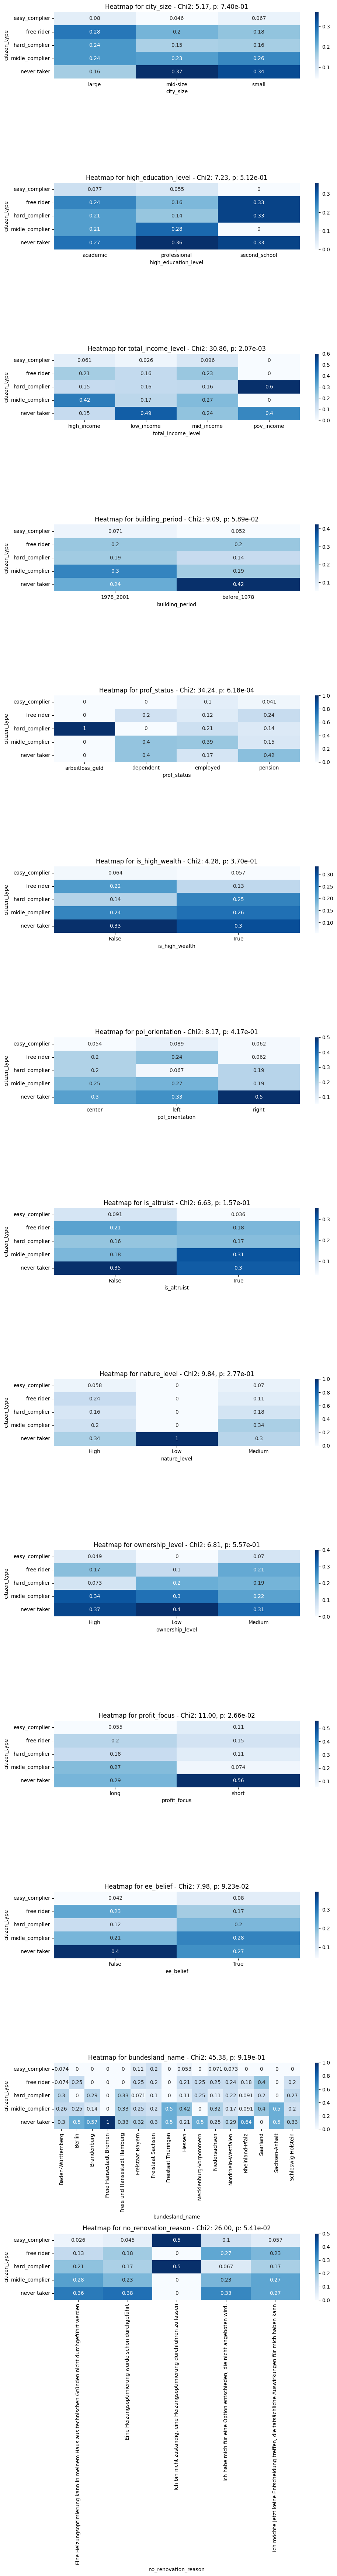

In [429]:
relevant_columns = ['city_size', 'high_education_level', 'total_income_level', 'building_period','prof_status', 
                    'is_high_wealth', 'pol_orientation', 'is_altruist', 'nature_level','ownership_level', 
                    'profit_focus', 'ee_belief', 'bundesland_name','no_renovation_reason']

columns_to_convert = ['is_high_wealth', 'is_altruist', 'ee_belief'] 
for col in columns_to_convert:
    df_sel_complete_pol_ta_clean[col] = df_sel_complete_pol_ta_clean[col].replace({1: True, 0: False, 1.0: True, 0.0: False})

df_wo_defier = df_sel_complete_pol_ta_clean[df_sel_complete_pol_ta_clean['citizen_type']!='defier']

# Prepare for chi-square tests and heatmaps
fig, axes = plt.subplots(len(relevant_columns), 1, figsize=(10, 5 * len(relevant_columns)))

for i, col in enumerate(relevant_columns):
    # Create contingency table
    contingency_table = pd.crosstab(df_wo_defier['citizen_type'], df_wo_defier[col])
    normalized_table = contingency_table.apply(lambda x: x / x.sum(), axis=0)


    # Chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_text = f"Chi2: {chi2:.2f}, p: {p:.2e}"

    # Plot heatmap with Chi-square results
    sns.heatmap(normalized_table, annot=True, cmap="Blues", ax=axes[i])
    axes[i].set_title(f'Heatmap for {col} - {chi2_text}')

plt.tight_layout()
plt.show()

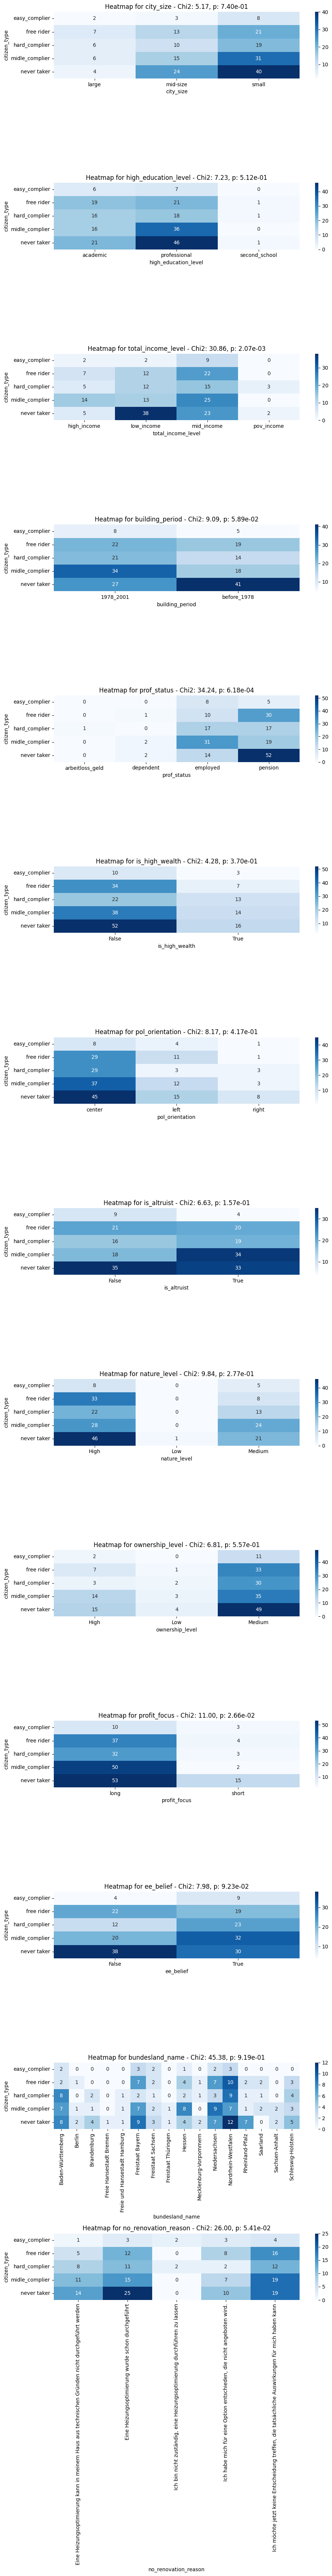

In [430]:
# Prepare for chi-square tests and heatmaps
fig, axes = plt.subplots(len(relevant_columns), 1, figsize=(10, 5 * len(relevant_columns)))

for i, col in enumerate(relevant_columns):
    # Create contingency table
    contingency_table = pd.crosstab(df_wo_defier['citizen_type'], df_wo_defier[col])
    normalized_table = contingency_table


    # Chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_text = f"Chi2: {chi2:.2f}, p: {p:.2e}"

    # Plot heatmap with Chi-square results
    sns.heatmap(normalized_table, annot=True, cmap="Blues", ax=axes[i])
    axes[i].set_title(f'Heatmap for {col} - {chi2_text}')

plt.tight_layout()
plt.show()

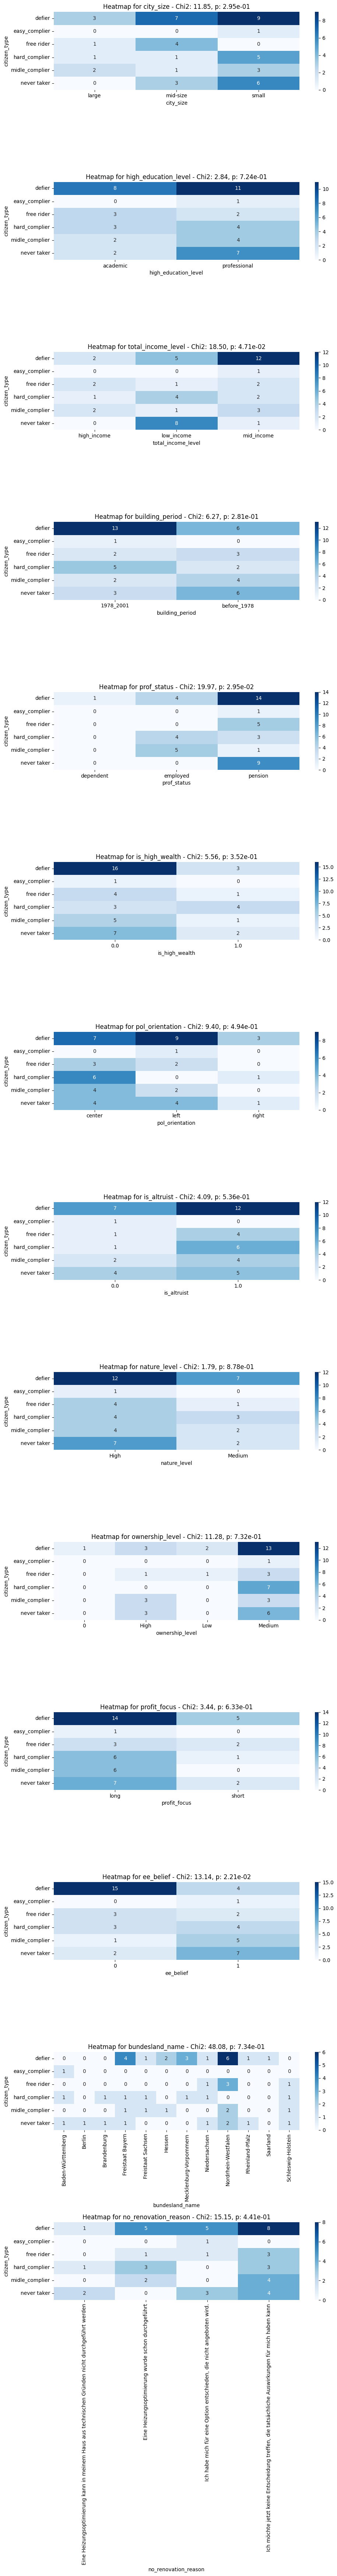

In [431]:
# Prepare for chi-square tests and heatmaps
fig, axes = plt.subplots(len(relevant_columns), 1, figsize=(10, 5 * len(relevant_columns)))

for i, col in enumerate(relevant_columns):
    # Create contingency table
    contingency_table = pd.crosstab(df_sampled['citizen_type'], df_sampled[col])
    normalized_table = contingency_table


    # Chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_text = f"Chi2: {chi2:.2f}, p: {p:.2e}"

    # Plot heatmap with Chi-square results
    sns.heatmap(normalized_table, annot=True, cmap="Blues", ax=axes[i])
    axes[i].set_title(f'Heatmap for {col} - {chi2_text}')

plt.tight_layout()
plt.show()

### 6. Evaluate relevance of factors to be considered for the prompt

#### 6.1. Calculate spearman correlation

In [340]:
def transpose_columns_to_rows(df, columns_to_transpose):
    """
    Transpose specified columns into new rows, keeping other column values constant.

    Parameters:
    - df: A pandas DataFrame.
    - columns_to_transpose: A list of column names to be transposed.

    Returns:
    - A new DataFrame with the specified columns transposed into rows.
    """
    id_vars = [col for col in df.columns if col not in columns_to_transpose]
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=columns_to_transpose, var_name='renovation_decision_type', value_name='renovation_decision')
    
    return melted_df

def preprocess_coorelation(df, column_types):
    """
    Preprocess the DataFrame and fit a regression model (OLS or Logistic).

    Parameters:
    df (pd.DataFrame): The DataFrame to preprocess.
    column_types (dict): Dictionary with column names as keys and data types as values.
    target_col (str): The name of the target variable column.
    regression_type (str): Type of regression ('ols' for OLS regression, 'logit' for Logistic regression).
    binary_mapping (dict, optional): Mapping for binary logistic regression target variable.

    Returns:
    Regression model results.
    """
    # Separate the columns based on type
    categorical_cols = [col for col, dtype in column_types.items() if dtype == 'cat']
    continuous_cols = [col for col, dtype in column_types.items() if dtype in ['con', 'ord']]

    # Preprocessing pipelines
    continuous_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])

    # Combine preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', continuous_pipeline, continuous_cols),
            ('cat', categorical_pipeline, categorical_cols)
        ])

    # Fit and transform the data
    X_transformed = preprocessor.fit_transform(df)

    # Get feature names for continuous and one-hot encoded categorical columns
    continuous_features = continuous_cols
    categorical_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
    all_features = continuous_features + list(categorical_features)

    # Create a DataFrame with all features and standardized/encoded column names
    X_processed = pd.DataFrame(X_transformed, columns=all_features)
    
    # Reset index before fitting the model
    X_processed.reset_index(drop=True, inplace=True)

    # Plotting the correlation matrix heatmap
    corr_matrix = X_processed.corr(method='spearman')
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title('Spearman Correlation Matrix Heatmap')
    plt.show()

In [395]:
df_sel_complete_pol_ta_clean.shape

(396, 319)

In [396]:
final_columns = ['ea801', 'ea802', 'ea803', 'ea804', 'ea805', 'ea806', 'ea807', 'ea808', 'ea809', 'ea810', 'ea811', 
               'ea812', 'ea813', 'ea814', 'ea815']
df_sel_complete_pol_ta_decision = transpose_columns_to_rows(df_sel_complete_pol_ta_clean, final_columns)
assert len(df_sel_complete_pol_ta_clean) == len(df_sel_complete_pol_ta_decision)/15
df_sel_complete_pol_ta_clean_decision = df_sel_complete_pol_ta_decision[df_sel_complete_pol_ta_decision['renovation_decision']!=3]
df_sel_complete_pol_ta_clean_decision['renovation_decision'] = df_sel_complete_pol_ta_clean_decision['renovation_decision'].map({1:0,2:1})
assert df_sel_complete_pol_ta_clean_decision.groupby(['key']).count()['bundesland'].unique() == np.array([15])

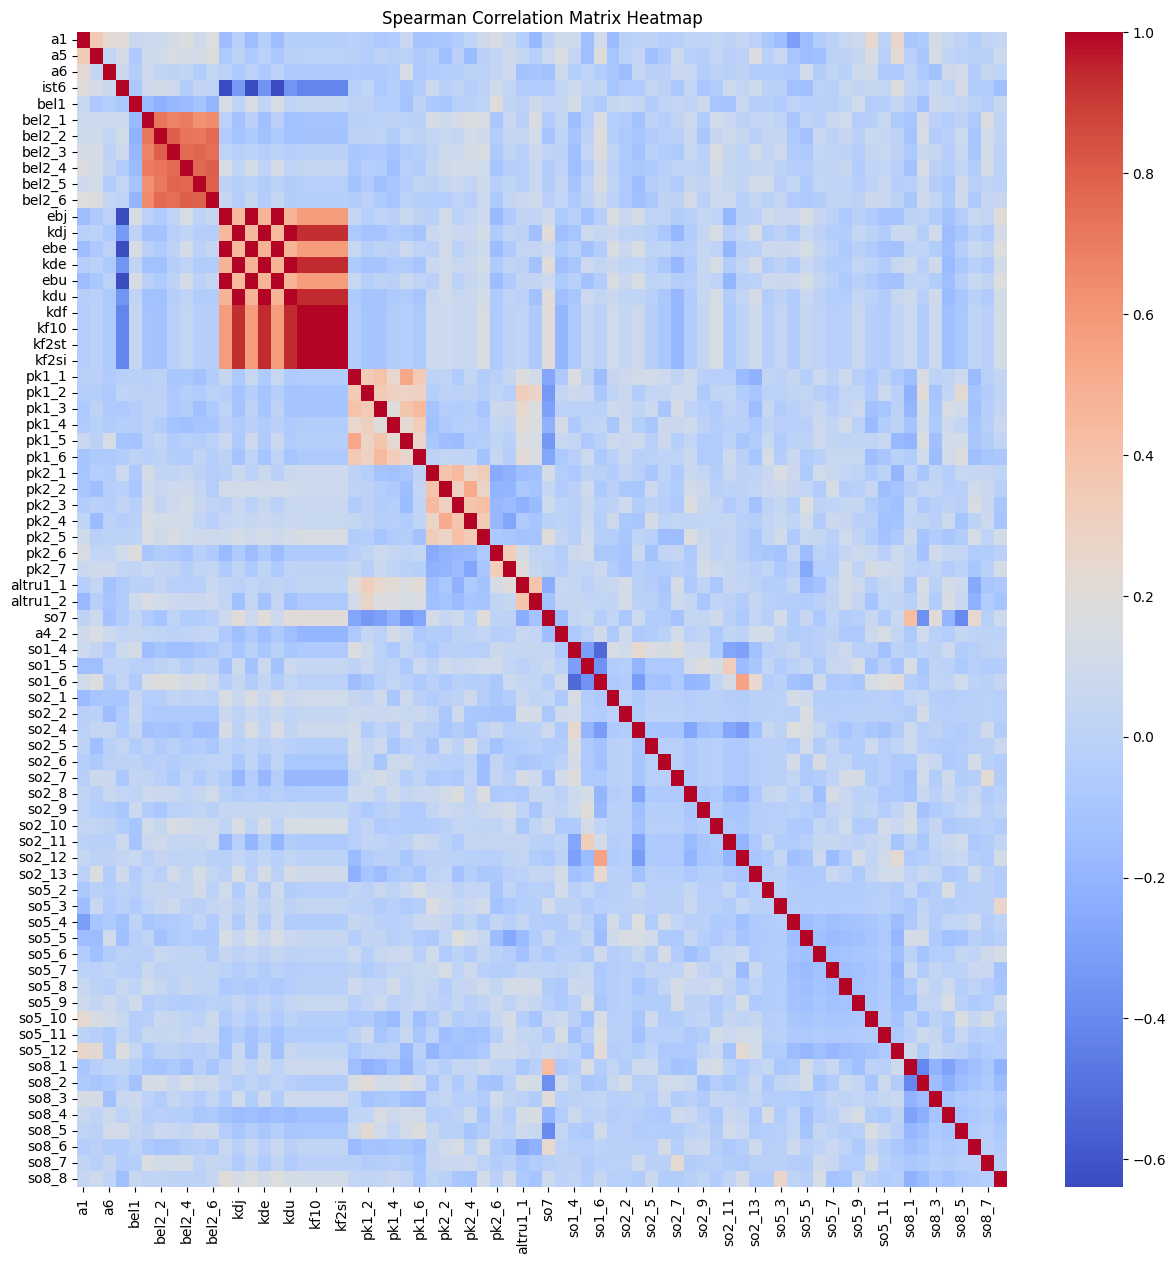

In [397]:
relevant_cols = ['a1', 'a2', 'a4', 'a5','so5', 'so6', 'so7', 'so8',
                'a6', 'a7', 'ist6', 'bel1', 'bel2_1', 'bel2_2', 'bel2_3', 'bel2_4', 'bel2_5',
                'bel2_6', 'pk1_1', 'pk1_2', 'pk1_3', 'pk1_4', 'pk1_5', 'pk1_6', 'pk2_1',
                'pk2_2', 'pk2_3', 'pk2_4', 'pk2_5', 'pk2_6', 'pk2_7', 'altru1_1',
                'altru1_2', 'pk31','pk32', 'pk33', 'pk34','pk35', 'so1', 'so2', 'so3_1', 'so3_2',
                'so3_3', 'so3_4', 'so3_5', 'so3_6', 'so3_7', 'so3_8', 'so3_9', 'so3_10',
                'ebj', 'kdj', 'ebe', 'kde', 'ebu', 'kdu', 'kdf', 'kf10', 'kf2st','kf2si']
df_references = pd.read_csv("../../../data/ariadne/heating_buildings/structured_data-waerme_complete.csv", sep=',', encoding='utf-8')
df_references_filtered = df_references[df_references['name'].isin(relevant_cols)]
df_dtypes = df_references_filtered[['clean_type','name']][df_references_filtered[['clean_type','name']]['name'].isin(relevant_cols)]
column_type_dict = {row['name']: row['clean_type'] for _, row in df_dtypes.iterrows()}
column_type_dict['renovation_decision'] = 'bool'
model = preprocess_coorelation(df_sel_complete_pol_ta_clean_decision[relevant_cols+['renovation_decision']], column_type_dict)

In [424]:
column_type_dict

{'a1': 'con',
 'a2': 'cat',
 'a4': 'cat',
 'a5': 'con',
 'a6': 'ord',
 'a7': 'bool',
 'bel1': 'con',
 'bel2_1': 'ord',
 'bel2_2': 'ord',
 'bel2_3': 'ord',
 'bel2_4': 'ord',
 'bel2_5': 'ord',
 'bel2_6': 'ord',
 'ebj': 'con',
 'kdj': 'con',
 'ebe': 'con',
 'kde': 'con',
 'ebu': 'con',
 'kdu': 'con',
 'kdf': 'con',
 'kf10': 'con',
 'kf2st': 'con',
 'kf2si': 'con',
 'pk1_1': 'ord',
 'pk1_2': 'ord',
 'pk1_3': 'ord',
 'pk1_4': 'ord',
 'pk1_5': 'ord',
 'pk1_6': 'ord',
 'pk2_1': 'ord',
 'pk2_2': 'ord',
 'pk2_3': 'ord',
 'pk2_4': 'ord',
 'pk2_5': 'ord',
 'pk2_6': 'ord',
 'pk2_7': 'ord',
 'altru1_1': 'ord',
 'altru1_2': 'ord',
 'pk31': 'bool',
 'pk32': 'bool',
 'pk33': 'bool',
 'pk34': 'bool',
 'pk35': 'bool',
 'so6': 'bool',
 'so7': 'ord',
 'so8': 'cat',
 'city_size': 'cat',
 'high_education_level': 'cat',
 'total_income_level': 'cat',
 'building_period': 'cat',
 'prof_status': 'cat',
 'is_high_wealth': 'cat',
 'is_east': 'cat',
 'renovation_decision': 'cat'}

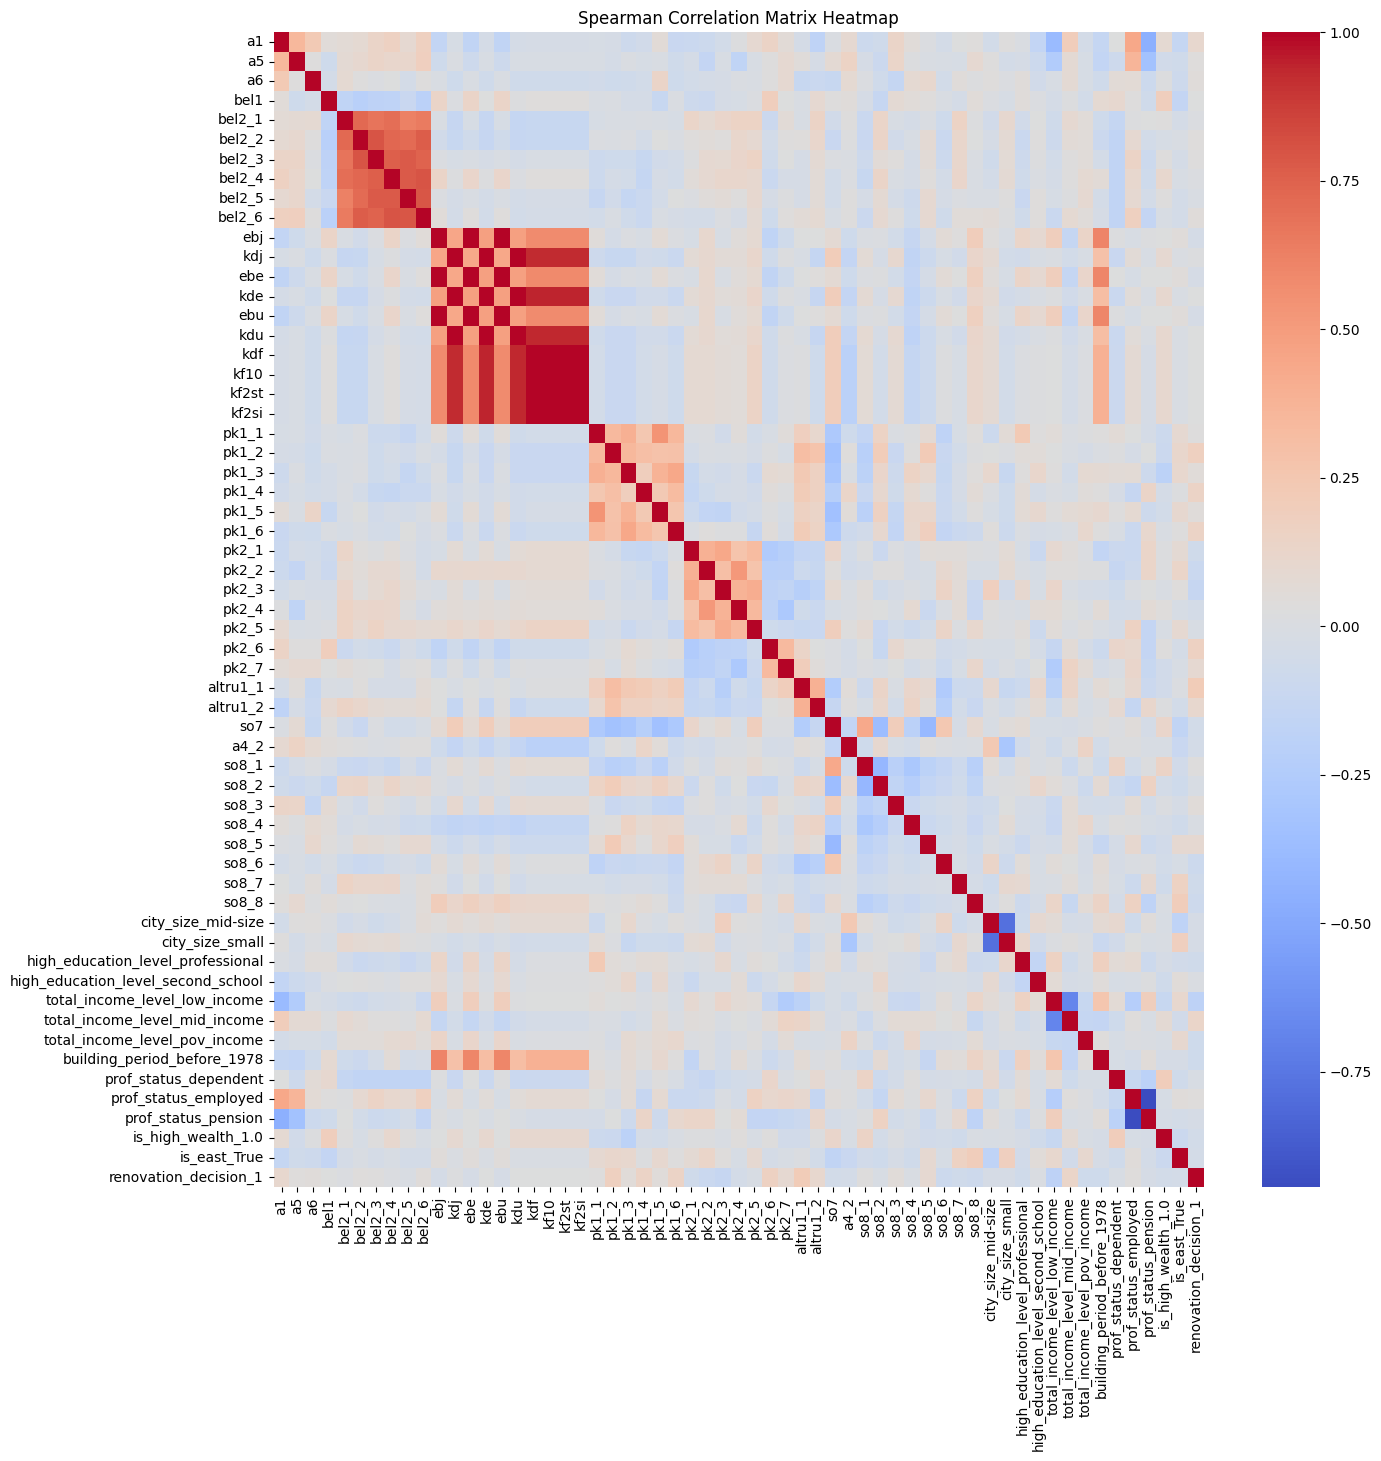

In [423]:
relevant_cols = ['a1', 'a2', 'a4', 'a5', 'so6', 'so7', 'so8',
                'a6', 'a7', 'bel1', 'bel2_1', 'bel2_2', 'bel2_3', 'bel2_4', 'bel2_5',
                'bel2_6', 'pk1_1', 'pk1_2', 'pk1_3', 'pk1_4', 'pk1_5', 'pk1_6', 'pk2_1',
                'pk2_2', 'pk2_3', 'pk2_4', 'pk2_5', 'pk2_6', 'pk2_7', 'altru1_1',
                'altru1_2', 'pk31','pk32', 'pk33', 'pk34','pk35',
                'ebj', 'kdj', 'ebe', 'kde', 'ebu', 'kdu', 'kdf', 'kf10', 'kf2st','kf2si']
extra_cols = ['city_size', 'high_education_level', 'total_income_level','building_period','prof_status','is_high_wealth','is_east','renovation_decision']
df_references = pd.read_csv("../../../data/ariadne/heating_buildings/structured_data-waerme_complete.csv", sep=',', encoding='utf-8')
df_references_filtered = df_references[df_references['name'].isin(relevant_cols)]
df_dtypes = df_references_filtered[['clean_type','name']][df_references_filtered[['clean_type','name']]['name'].isin(relevant_cols)]
column_type_dict = {row['name']: row['clean_type'] for _, row in df_dtypes.iterrows()}
for col in extra_cols:
    column_type_dict[col] = 'cat'
model = preprocess_coorelation(df_sel_complete_pol_ta_clean_decision[relevant_cols+extra_cols], column_type_dict)

#### 6.2. Calculate Cramer's V Correlation

In [399]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Function to plot Cramer's V Correlation Heatmap
def plot_cramers_v_heatmap(df, columns):
    # Initialize the Cramer's V matrix
    corr_matrix = pd.DataFrame(index=columns, columns=columns)

    # Calculate Cramer's V for each pair of variables
    for col1 in columns:
        for col2 in columns:
            corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

    # Convert the matrix into float format
    corr_matrix = corr_matrix.astype(float)

    # Plot the heatmap
    plt.figure(figsize=(12, 10))  # Adjust size as needed
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')#, fmt='.2f', linewidths=.5)
    plt.title('Cramer\'s V Correlation Matrix')
    plt.show()

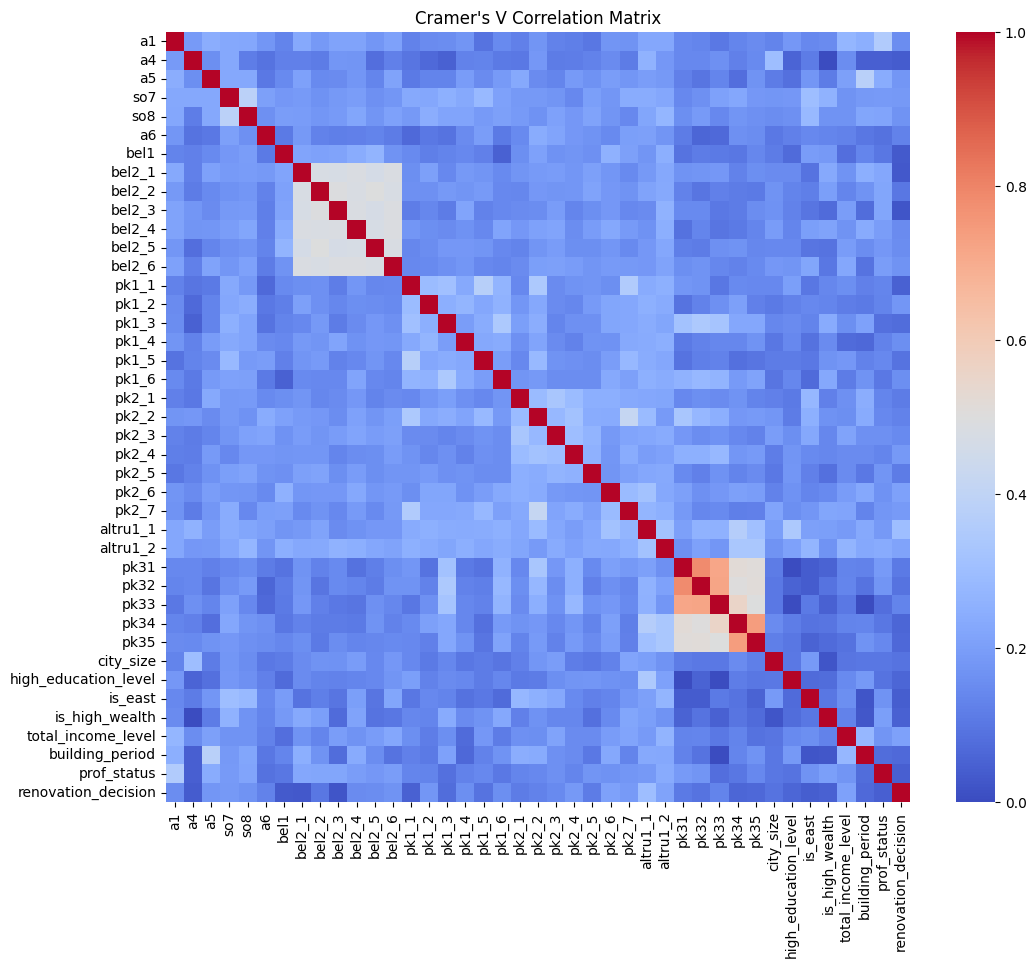

In [400]:
relevant_cols = ['a1', 'a4', 'a5', 'so7', 'so8',
                'a6', 'bel1', 'bel2_1', 'bel2_2', 'bel2_3', 'bel2_4', 'bel2_5',
                'bel2_6', 'pk1_1', 'pk1_2', 'pk1_3', 'pk1_4', 'pk1_5', 'pk1_6', 'pk2_1',
                'pk2_2', 'pk2_3', 'pk2_4', 'pk2_5', 'pk2_6', 'pk2_7', 'altru1_1',
                'altru1_2', 'pk31','pk32', 'pk33', 'pk34','pk35','city_size', 'high_education_level','is_east', 'is_high_wealth',
                'total_income_level','building_period','prof_status','renovation_decision']
plot_cramers_v_heatmap(df_sel_complete_pol_ta_clean_decision, relevant_cols)

In [419]:
def preprocess_and_fit_log_regression(df, column_types, target_col, regression_type='ols', binary_mapping=None):
    """
    Preprocess the DataFrame and fit a regression model (OLS or Logistic).

    Parameters:
    df (pd.DataFrame): The DataFrame to preprocess.
    column_types (dict): Dictionary with column names as keys and data types as values.
    target_col (str): The name of the target variable column.
    regression_type (str): Type of regression ('ols' for OLS regression, 'logit' for Logistic regression).
    binary_mapping (dict, optional): Mapping for binary logistic regression target variable.

    Returns:
    Regression model results.
    """
    # Separate the columns based on type
    categorical_cols = [col for col, dtype in column_types.items() if dtype  in ['cat', 'bool']]
    continuous_cols = [col for col, dtype in column_types.items() if dtype in ['con', 'ord']]
    print(categorical_cols)
    print(continuous_cols)
    df_ = df.replace(-1,np.nan)

    # Preprocessing pipelines
    continuous_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])

    # Combine preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', continuous_pipeline, continuous_cols),
            ('cat', categorical_pipeline, categorical_cols)
        ])

    # Fit and transform the data
    X_transformed = preprocessor.fit_transform(df_.drop(target_col, axis=1))

    # Get feature names for continuous and one-hot encoded categorical columns
    continuous_features = continuous_cols
    categorical_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
    all_features = continuous_features + list(categorical_features)
    print(all_features)

    # TODO: AVOID HARDCODED SOLUTION
    d_feature_names = dict(zip(all_features,['age','n_housholds', 'years_in_flat','years_in_flat_future','belief_ener_eff','belief_ren_roof',
                         'humans_vs_natur_2','humans_vs_natur_4','humans_vs_natur_5','ownership_2','ownership_7',
                         'altru_future', 'altru_others','political_orientation','building_type_Reihen-/Doppelhaus',
                         'long_term_prof_year_low','long_term_prof_year_high'] + \
                         ['city_size_mid-size', 'city_size_small', 'high_education_level_professional', 'high_education_level_second_school', 
                          'total_income_level_low_income', 'total_income_level_mid_income', 'total_income_level_pov_income', 
                          'building_period_before_1978', 'prof_status_dependent', 'prof_status_employed', 'prof_status_pension','is_high_wealth'])) #'is_east'
    new_features = [d_feature_names[i] for i in all_features]

    # Create a DataFrame with all features and standardized/encoded column names
    X_processed = pd.DataFrame(X_transformed, columns=new_features)
    
    # Reset index before fitting the model
    X_processed.reset_index(drop=True, inplace=True)
    y = df[target_col].reset_index(drop=True)

    # Plotting the correlation matrix heatmap
    corr_matrix = pd.concat([X_processed, y.map(binary_mapping)], axis=1).corr(method="spearman")
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title('Spearman Correlation Matrix Heatmap')
    plt.show()

    # Convert target variable for logistic regression
    if regression_type == 'logit':
        if binary_mapping:
            y = y.map(binary_mapping)
            # Check if y contains only 0 and 1
            if not np.all(np.isin(y.unique(), [0, 1])):
                raise ValueError("Target variable after mapping must contain only 0 and 1.")
        else:
            raise ValueError("Binary mapping for target variable is required for logistic regression.")

    # Add a constant to the model (for the intercept)
    X_with_const = sm.add_constant(X_processed)

    # Fit the model based on the specified regression type
    if regression_type == 'ols':
        model = sm.OLS(y, X_with_const).fit()
    elif regression_type == 'logit':
        model = sm.Logit(y, X_with_const).fit()
    else:
        raise ValueError("Invalid regression type specified. Choose 'ols' or 'logit'.")

    return model, new_features, X_processed

['a4', 'pk31', 'pk35', 'city_size', 'high_education_level', 'total_income_level', 'building_period', 'prof_status', 'is_high_wealth']
['a1', 'a5', 'a6', 'bel1', 'bel2_1', 'pk1_1', 'pk1_3', 'pk1_6', 'pk2_3', 'pk2_7', 'altru1_1', 'altru1_2', 'so7']
['a1', 'a5', 'a6', 'bel1', 'bel2_1', 'pk1_1', 'pk1_3', 'pk1_6', 'pk2_3', 'pk2_7', 'altru1_1', 'altru1_2', 'so7', 'a4_2', 'pk31_2.0', 'pk35_2.0', 'city_size_mid-size', 'city_size_small', 'high_education_level_professional', 'high_education_level_second_school', 'total_income_level_low_income', 'total_income_level_mid_income', 'total_income_level_pov_income', 'building_period_before_1978', 'prof_status_dependent', 'prof_status_employed', 'prof_status_pension', 'is_high_wealth_1.0']


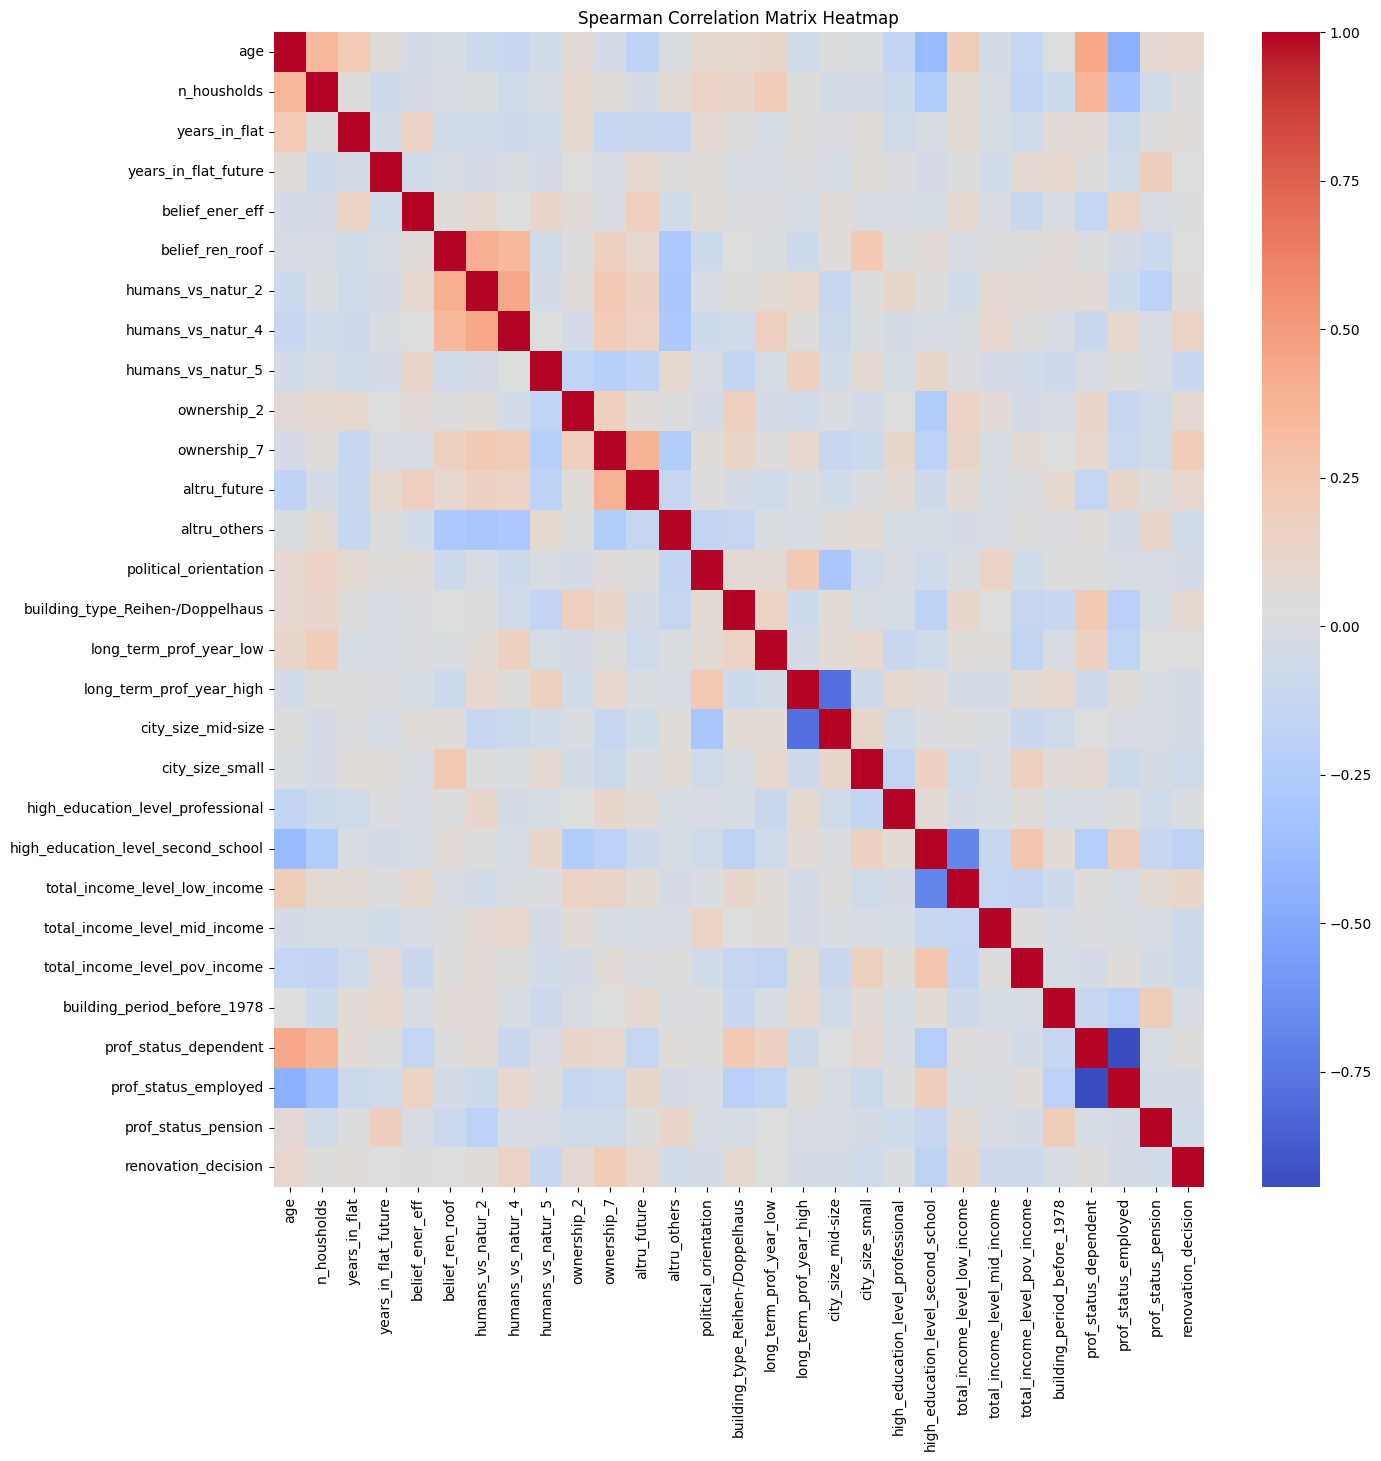

Optimization terminated successfully.
         Current function value: 0.599592
         Iterations 6


In [420]:
extra_cols = ['city_size', 'high_education_level', 'total_income_level','building_period','prof_status','is_high_wealth'] #'is_east',
relevant_cols = ['altq','a1', 'a4', 'a5', 'so7',
                'a6', 'bel1', 'bel2_1', 'pk1_1', 'pk1_3','pk1_6','pk2_3', 'pk2_7', 'altru1_1',
                'altru1_2', 'pk31','pk35']
df_dtypes = df_references_filtered[['clean_type','name']][df_references_filtered[['clean_type','name']]['name'].isin(relevant_cols)]
column_type_dict = {row['name']: row['clean_type'] for _, row in df_dtypes.iterrows()}
for col in extra_cols:
    column_type_dict[col] = 'cat'
model, feature_names, X_processed = preprocess_and_fit_log_regression(df_sel_complete_pol_ta_clean_decision[relevant_cols + extra_cols + ['renovation_decision']], 
                              column_type_dict, 'renovation_decision', regression_type='logit', binary_mapping={1:1,0:0})

In [421]:
print(model.summary())

                            Logit Regression Results                           
Dep. Variable:     renovation_decision   No. Observations:                 3285
Model:                           Logit   Df Residuals:                     3256
Method:                            MLE   Df Model:                           28
Date:                 Fri, 05 Jan 2024   Pseudo R-squ.:                  0.1011
Time:                         10:33:42   Log-Likelihood:                -1969.7
converged:                        True   LL-Null:                       -2191.3
Covariance Type:             nonrobust   LLR p-value:                 2.912e-76
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.7903      0.796     -0.993      0.321      -2.350       0.769
age                                    0.2680      

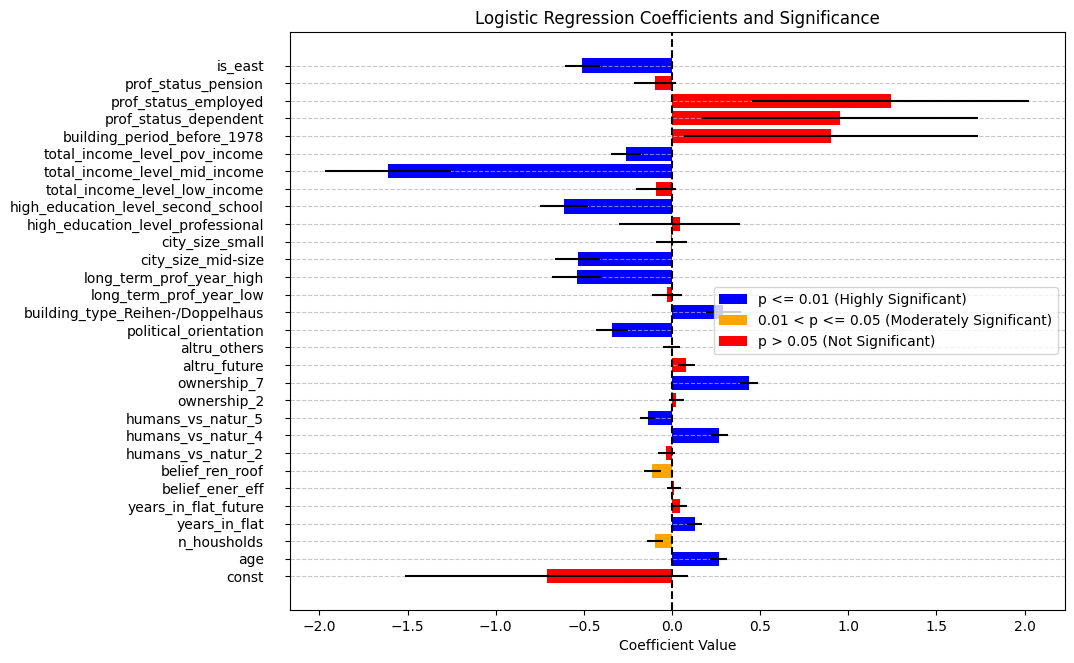

In [418]:
# Convert the summary to a DataFrame
results_as_html = model.summary().tables[1].as_html()
results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

# Define a function to determine the color based on the p-value
def get_color(p):
    if p <= 0.01:
        return 'blue'
    elif p <= 0.05:
        return 'orange'
    else:
        return 'red'

# Apply the function to get colors for each coefficient based on its p-value
# Adjust the column name to 'P>|z|' for logistic regression
results_df['color'] = results_df['P>|z|'].apply(get_color)

# Plot the coefficients with colors
plt.figure(figsize=(10, len(results_df) / 4))  # Adjust the figure size
bars = plt.barh(results_df.index, results_df['coef'], color=results_df['color'], xerr=results_df['std err'])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients and Significance')
plt.axvline(x=0, color='black', linestyle='--')

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend for significance levels
plt.legend(handles=[plt.Rectangle((0,0),1,1,fc=color, edgecolor='none') for color in ['blue', 'orange', 'red']],
           labels=['p <= 0.01 (Highly Significant)', '0.01 < p <= 0.05 (Moderately Significant)', 'p > 0.05 (Not Significant)'],
           loc='right')

# Increase space between the y-axis tick labels and the axis
plt.gca().tick_params(axis='y', which='major', pad=15)

# Save the figure
plt.savefig('../../../images/logistic_coefficients_decision_cata.png', bbox_inches='tight')

# Show the plot
plt.show()

In [220]:
factors_to_be_considered_from_analysis = ['is_high_wealth','building_period_before_1978','total_income_level_low_income','total_income_level_pov_income',
                                          'city_size_mid-size','city_size_small','long_term_prof_year_low','building_type_Reihen-/Doppelhaus',
                                          'altru_future','ownership_2','humans_vs_natur_5','humans_vs_natur_2','years_in_flat_future',
                                          'years_in_flat','n_housholds']

In [434]:
df_sel_complete_pol_ta_clean_decision.shape#['a6'].unique()

(3285, 306)